# **Health Insurance Cost Prediction and Analysis**

**Import Libraries**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Load the DataSet**

In [56]:
df = pd.read_csv('/content/insurance.csv')

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Data Cleaning**

In [58]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [60]:
df.shape

(1338, 7)

**Hence the above data seems to be cleaned**

# **Exploratory Data Analysis**

In [61]:
sns.set(style="whitegrid", palette="husl")

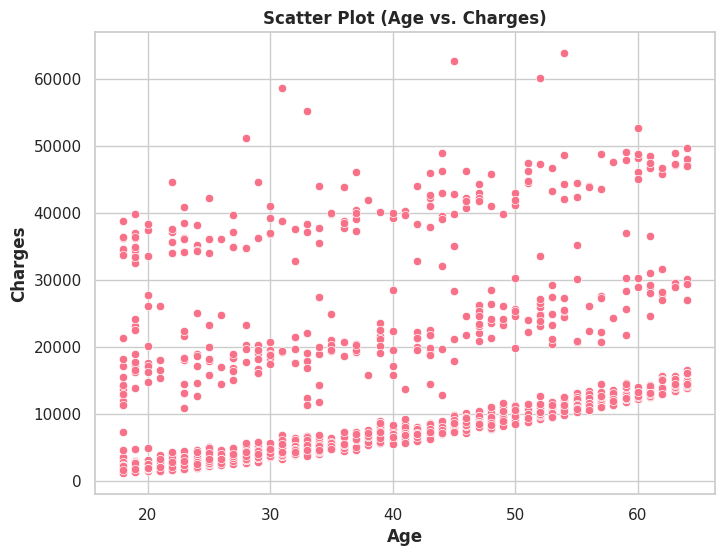

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="charges")
plt.title('Scatter Plot (Age vs. Charges)', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Charges', fontweight='bold')
plt.show()

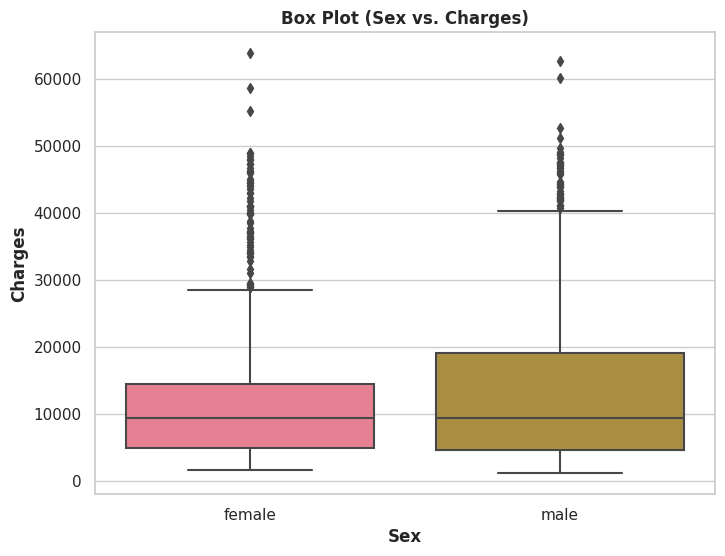

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="sex", y="charges")
plt.title('Box Plot (Sex vs. Charges)', fontweight='bold')
plt.xlabel('Sex', fontweight='bold')
plt.ylabel('Charges', fontweight='bold')
plt.show()

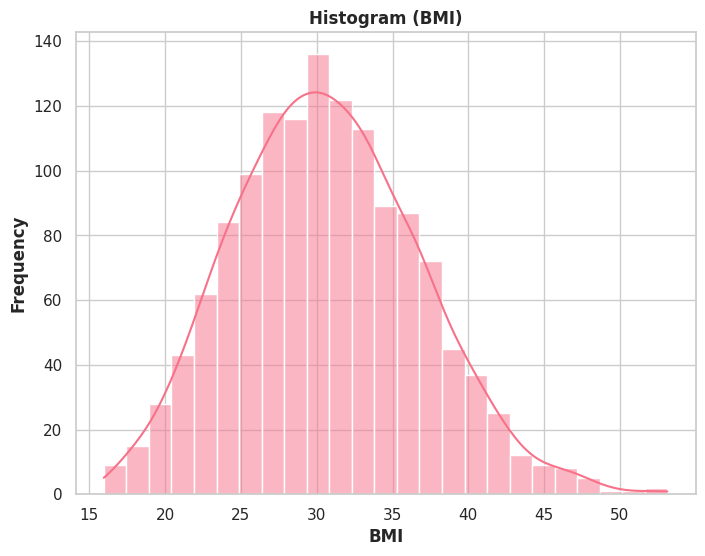

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="bmi", kde=True)
plt.title('Histogram (BMI)', fontweight='bold')
plt.xlabel('BMI', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()

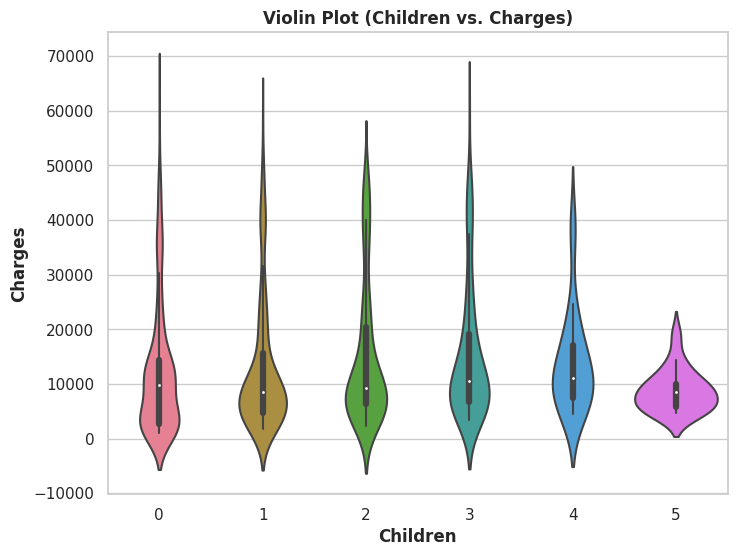

In [65]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="children", y="charges")
plt.title('Violin Plot (Children vs. Charges)', fontweight='bold')
plt.xlabel('Children', fontweight='bold')
plt.ylabel('Charges', fontweight='bold')
plt.show()

<Figure size 800x600 with 0 Axes>

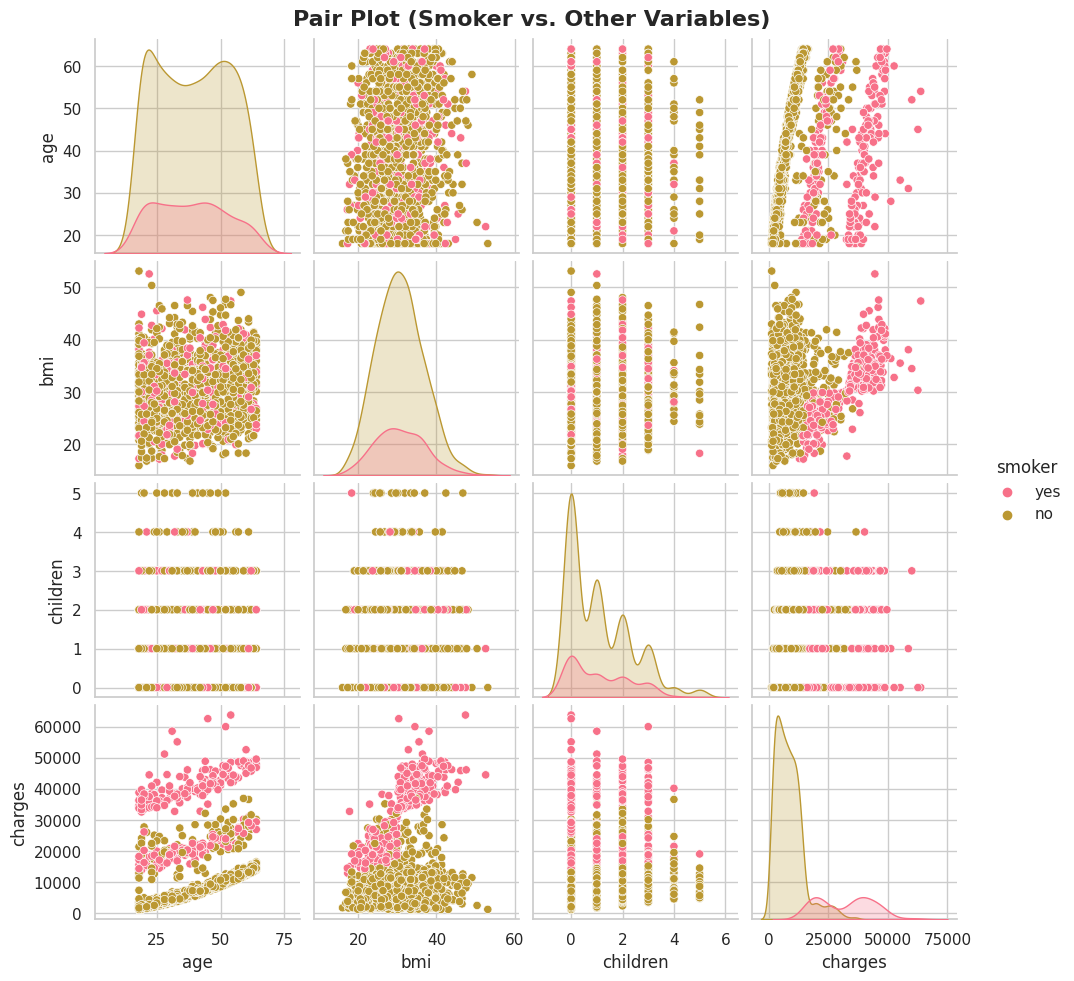

In [66]:
sns.set(style="whitegrid", palette="husl")
plt.figure(figsize=(8, 6))
pair_plot = sns.pairplot(data=df, hue="smoker", diag_kind="kde")
plt.subplots_adjust(top=0.95)
pair_plot.fig.suptitle('Pair Plot (Smoker vs. Other Variables)', fontsize=16, fontweight='bold')
plt.show()

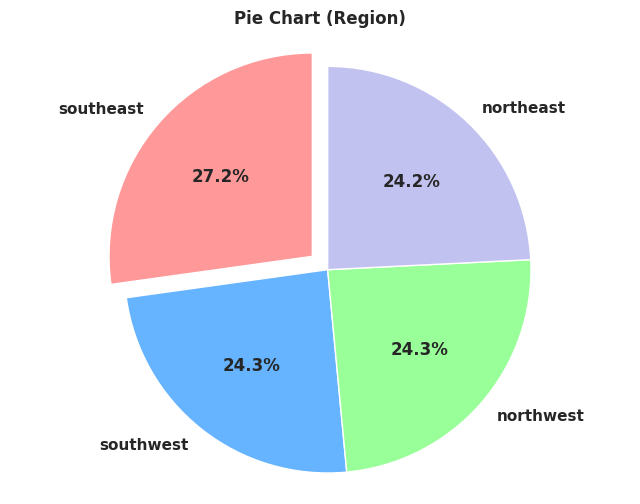

In [67]:
region_counts = df['region'].value_counts()

explode = (0.1, 0, 0, 0)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']

plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors, textprops={'fontweight': 'bold'})
plt.title('Pie Chart (Region)', fontweight='bold')
plt.axis('equal')
plt.show()

<ipython-input-68-37b375558e58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


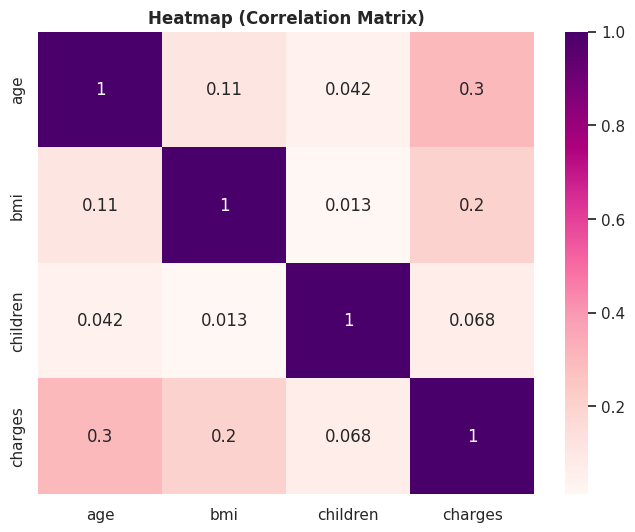

In [68]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu')
plt.title('Heatmap (Correlation Matrix)', fontweight='bold')
plt.show()

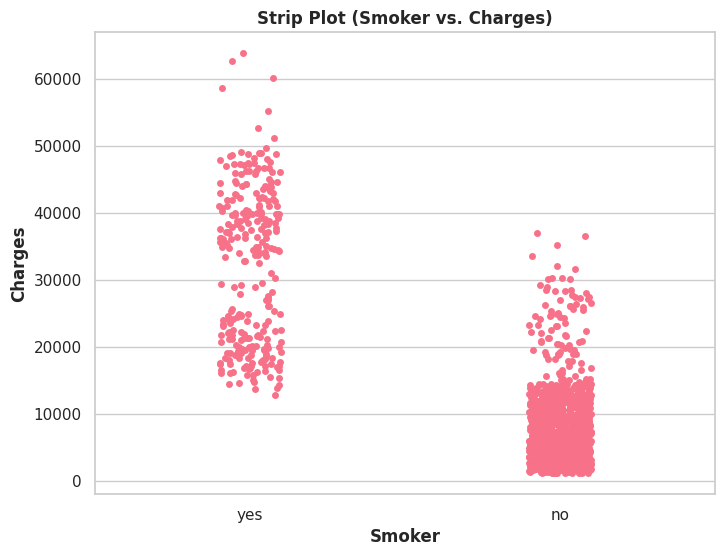

In [69]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x="smoker", y="charges", jitter=True)
plt.title('Strip Plot (Smoker vs. Charges)', fontweight='bold')
plt.xlabel('Smoker', fontweight='bold')
plt.ylabel('Charges', fontweight='bold')
plt.show()

# **Building the Right ML Model**

In [70]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)
X = df.drop(columns=["charges"])
y = df["charges"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = LinearRegression()

In [73]:
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 33596915.85136145
R-squared: 0.7835929767120724


**Lets try other models since the R-Squared is 78%**

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_scaled = model.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Scaled Mean Squared Error: {mse_scaled}")
print(f"Scaled R-squared: {r2_scaled}")


Scaled Mean Squared Error: 33596915.851361476
Scaled R-squared: 0.7835929767120722


**Polynomial Regression Model Evaluation and Metrics**

In [80]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred_poly = model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Mean Squared Error: {mse_poly}")
print(f"Polynomial R-squared: {r2_poly}")


Polynomial Mean Squared Error: 21056353.22549122
Polynomial R-squared: 0.8643702075813291
